In [280]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv


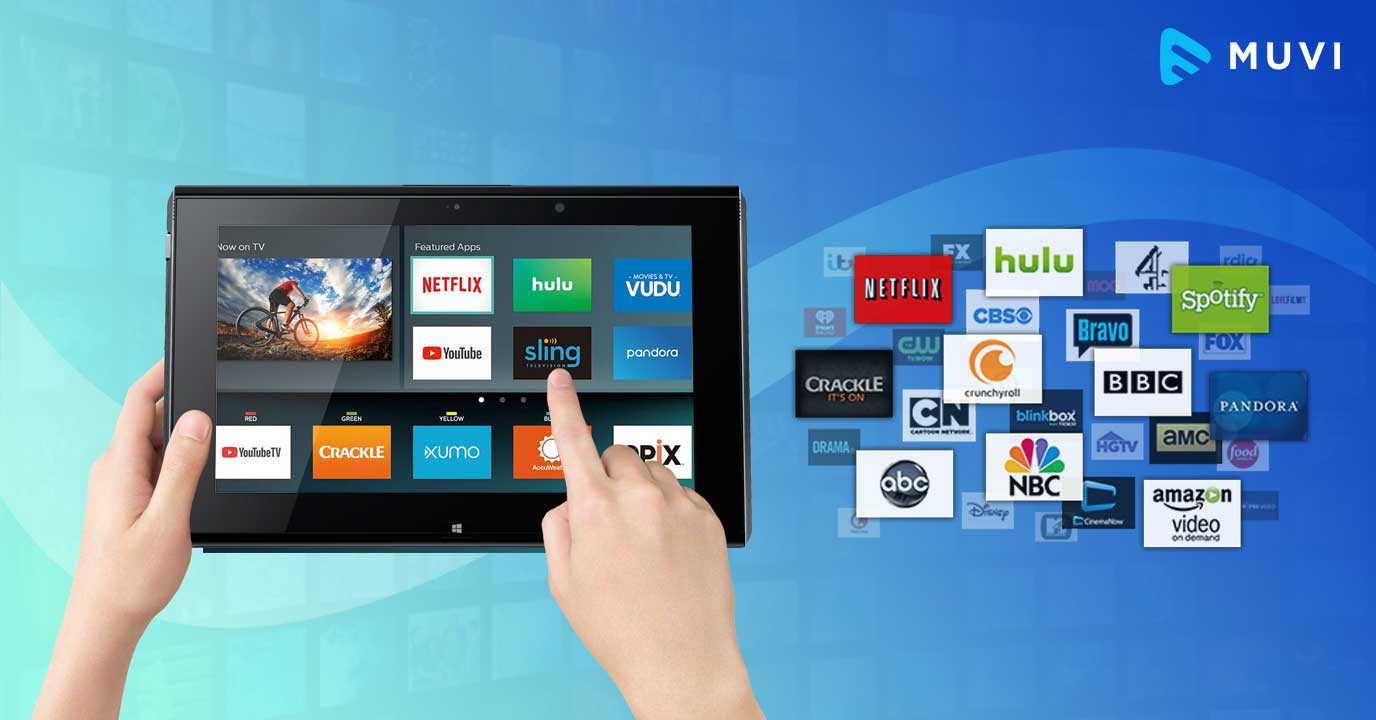

# Wanna Binge some movies? Confused? 


# Here 's the solution.


# 


<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
            We will get following answers:- :
            </span>   
    </font>
</h2>

(1)  Which OTT platform is the best for IMDB 9+ Movies/Shows

(2)  On which OTT Platforms, Nolan and Russo Brother's movies are available?

(3)  Best Thrillers/ Actions/ Adventure/ Sci-fi Movies and its OTT platform

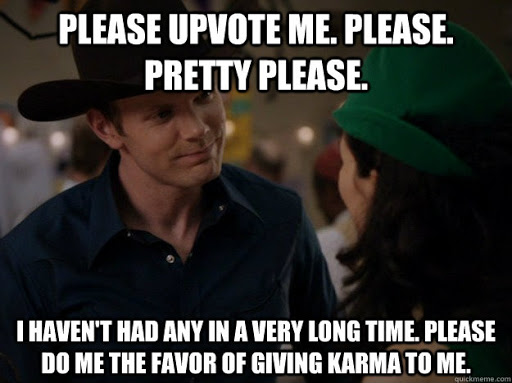

<h2>   
      <span>          
           Contents
    </span>
       
</h2>
<span>
    <ul>
        <li><a href='#intro'>1. Introduction</a></li>
        <ul>
            <li><a href='#background'>1.1 Background info</a></li>
            <li><a href='#data'>1.2 Dataset information</a></li>
        </ul>
        <li><a href='#libraries'>2. Python Libraries</a></li>
        <ul>
            <li><a href='#python'>2.1 Import Python Libraries</a></li>
         </ul>
        <li><a href='#understand'>3. Understanding the data</a></li>
        <ul>
            <li><a href='#import'>3.1 Importing the input csv</a></li>
            <li><a href='#inspect'>3.2 Overview the dataframes</a></li>
            <li><a href='#unwanted'>3.3 Observe Null Values</a></li>
            <li><a href='#unwanted'>3.4 Pandas Profiling</a></li>
        </ul>
              <li><a href='#eda'>4. EDA (Exploratory Data Anslysis)</a></li>
        <ul>
            <li><a href='#app_Rating'>4.1 Highest ROtten Tomatoes Movies/Shows</a></li>
            <li><a href='#rating_cate'>4.2 Highest IMDB Rating</a></li>
            <li><a href='#type'>4.3 Top Movies and its OTT Platform</a></li>        
            <li><a href='#type'>4.4 Top Language Movies</a></li>        
            <li><a href='#type'>4.5 Best Christopher Nolan's Movies</a></li>        
            <li><a href='#type'>4.6 Best Russo Brother's Movies</a></li>        
            <li><a href='#type'>4.7 Best Thriller Movies/Shows</a></li>        
            <li><a href='#type'>4.8 Movies/Shows on OTT Platforms</a></li>        
            <li><a href='#type'>4.9 Best Animation Movies/Show</a></li>                       
        </ul>
            <li><a href='#low'>6. Netflix Overview</a></li>
        <ul>
            <li><a href='#low_app'>6.1 Available Languages</a></li>
             <li><a href='#tools'>6.2 Top Runtime movies/shows</a></li>
             <li><a href='#age'>6.3 Top IMDB Movies </a></li>
             <li><a href='#age'>6.4 Top Thriller Movies </a></li>
             <li><a href='#age'>6.5 Top SCIFI Movies </a></li>
             <li><a href='#age'>6.6 Top action Movies </a></li>
             <li><a href='#age'>6.7 Top  animation Movies </a></li> 
        </ul> 
          <li><a href='#low'>7. HULU Overview</a></li>
        <ul>
            <li><a href='#low_app'>7.1 Available Languages</a></li>
             <li><a href='#tools'>7.2 Top Runtime movies/shows</a></li>
             <li><a href='#age'>7.3 Top IMDB Movies </a></li>
             <li><a href='#age'>7.4 Top Thriller Movies </a></li>
             <li><a href='#age'>7.5 Top SCIFI Movies </a></li>
             <li><a href='#age'>7.6 Top action Movies </a></li>
             <li><a href='#age'>7.7 Top  animation Movies </a></li> 
        </ul> 
          <li><a href='#low'>8. Prime Video Overview</a></li>
        <ul>
            <li><a href='#low_app'>8.1 Available Languages</a></li>
             <li><a href='#tools'>8.2 Top Runtime movies/shows</a></li>
             <li><a href='#age'>8.3 Top IMDB Movies </a></li>
             <li><a href='#age'>8.4 Top Thriller Movies </a></li>
             <li><a href='#age'>8.5 Top SCIFI Movies </a></li>
             <li><a href='#age'>8.6 Top action Movies </a></li>
             <li><a href='#age'>8.7 Top  animation Movies </a></li> 
        </ul> 
        <li><a href='#low'>9. Disney+ Overview</a></li>
        <ul>
            <li><a href='#low_app'>9.1 Available Languages</a></li>
             <li><a href='#tools'>9.2 Top Runtime movies/shows</a></li>
             <li><a href='#age'>9.3 Top IMDB Movies </a></li>
             <li><a href='#age'>9.4 Top Thriller Movies </a></li>
             <li><a href='#age'>9.5 Top SCIFI Movies </a></li>
             <li><a href='#age'>9.6 Top action Movies </a></li>
             <li><a href='#age'>9.7 Top  animation Movies </a></li> 
        </ul>          
                <li><a href='#obser'>10. Conclusion</a></li>
                                


<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
            1. Introduction :
            </span>   
    </font>
</h2>

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            1.1 Background Information
            </span>   
    </font>
</h3>

Over the last few years, audiences in India have shifted their focus from TV to online streaming platforms. Out of the many platforms Hotstar, Netflix and Amazon Prime Video are currently the most popular ones.

However, this is not the only platform where people can watch unlimited movies and series, we have other OTT platforms that are making a tremendous business including Amazon Prime, Netflix.

On this related note, we have jotted down the features of all the platforms while also breaking down the have’s and have-nots of each. So let’s begin.

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            1.2 Dataset Information :
            </span>   
    </font>
</h3>

 
* ID:  Movie ID

* Title: Movie Title

* Year: Release Year

* Age: Age restriction

* IMDB: IMDB Rating

* ROttern Tomatoes: Tomatoes Rating

* Netflix, Hulu,Prime Video, Disney+ : OTT Platforms

* Type: Movie Genres

* DIrectors: Movie Director

![](http://)* Country: Release in Country

<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
            2. Python Libraries :
            </span>   
    </font>
</h2>

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            2.1: Import Python Libraries
            </span>   
    </font>
</h3>

In [281]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

# for data overview
from pandas_profiling import ProfileReport
import plotly.graph_objects as go
fig = go.Figure()
import re

<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
            3. Understanding the data
            </span>   
    </font>
</h2>

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            3.1 Importing the input csv
            </span>   
    </font>
</h3>

In [282]:
movie_data = pd.read_csv("/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv")

In [283]:
movie_data.head(5)

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

In [284]:
movie_data.shape

(16744, 17)

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            3.2 Overview the dataframes
            </span>   
    </font>
</h3>

In [285]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            3.3 Observe Null Values
            </span>   
    </font>
</h3>

In [286]:
movie_data.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [287]:
# Deal with null values


In [288]:
Age_Null = round(movie_data['Age'].isnull().sum()/len(movie_data['Age']) * 100 , 2)
Genres_Null = round(movie_data['Genres'].isnull().sum()/len(movie_data['Genres']) * 100 , 2)
Directors_Null = round(movie_data['Directors'].isnull().sum()/len(movie_data['Directors']) * 100 , 2)
Runtime_Null = round(movie_data['Runtime'].isnull().sum()/len(movie_data['Runtime']) * 100 , 2)
Language_Null = round(movie_data['Language'].isnull().sum()/len(movie_data['Language']) * 100 , 2)
Country_Null = round(movie_data['Country'].isnull().sum()/len(movie_data['Country']) * 100 , 2)    
Rotten_Null = round(movie_data['Rotten Tomatoes'].isnull().sum()/len(movie_data['Rotten Tomatoes']) * 100 , 2)                          

In [289]:
print("Age Null: {}%".format(Age_Null))
print("Genres_Null: {}%".format(Genres_Null))
print("Directors_Null: {}%".format(Directors_Null))
print("Runtime_Null : {}%".format(Runtime_Null))
print("Language_Null: {}%".format(Language_Null))
print("Country_Null: {}%".format(Country_Null))
print("Rotten_Null: {}%".format(Rotten_Null))


Age Null: 56.08%
Genres_Null: 1.64%
Directors_Null: 4.34%
Runtime_Null : 3.54%
Language_Null: 3.58%
Country_Null: 2.6%
Rotten_Null: 69.19%


In [290]:
# Let deal with Age Column
movie_data['Age'].value_counts(), movie_data['Age'].shape

(18+    3474
 7+     1462
 13+    1255
 all     843
 16+     320
 Name: Age, dtype: int64,
 (16744,))

In [291]:
movie_data['Age'].value_counts().iplot('bar')

Only less movies are targetted to the audience below age 12. and mostly OTT platforms include movie with  some age erstriction 18+

In [292]:
movie_data[movie_data['Age'].isnull()].shape

(9390, 17)

In [293]:
movie_data[movie_data['Age'].isnull()]

Unnamed: 0     ID                                           Title  \
32             32     33                                  Train to Busan   
57             57     58                                  A Silent Voice   
89             89     90                                   The Dawn Wall   
110           110    111                      Black Mirror: Bandersnatch   
123           123    124  Neon Genesis Evangelion: The End of Evangelion   
...           ...    ...                                             ...   
16736       16736  16737             Winged Seduction: Birds of Paradise   
16739       16739  16740                       The Ghosts of Buxley Hall   
16741       16741  16742                           Sharks of Lost Island   
16742       16742  16743                              Man Among Cheetahs   
16743       16743  16744                                In Beaver Valley   

       Year  Age  IMDb Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  \
32     2016  NaN   7.5             94%        1     0            1        0   
57     2016  NaN   8.2             94%        1     0            0        0   
89     2018  NaN   8.1            100%        1     0            0        0   
110    2018  NaN   7.2             92%        1     0            0        0   
123    1997  NaN   8.1             88%        1     0            0        0   
...     ...  ...   ...             ...      ...   ...          ...      ...   
16736  2012  NaN   6.5             NaN        0     0            0        1   
16739  1980  NaN   6.2             NaN        0     0            0        1   
16741  2013  NaN   5.7             NaN        0     0            0        1   
16742  2017  NaN   6.6             NaN        0     0            0        1   
16743  1950  NaN   NaN             NaN        0     0            0        1   

       Type                      Directors  \
32        0                   Sang-ho Yeon   
57        0                   Naoko Yamada   
89        0     Josh Lowell,Peter Mortimer   
110       0                    David Slade   
123       0  Hideaki Anno,Kazuya Tsurumaki   
...     ...                            ...   
16736     0                  Molly Hermann   
16739     0                   Bruce Bilson   
16741     0                   Neil Gelinas   
16742     0           Richard Slater-Jones   
16743     0                    James Algar   

                                      Genres                       Country  \
32                    Action,Horror,Thriller                   South Korea   
57            Animation,Drama,Family,Romance                         Japan   
89               Documentary,Biography,Sport         Austria,United States   
110            Drama,Mystery,Sci-Fi,Thriller  United States,United Kingdom   
123    Animation,Action,Drama,Fantasy,Sci-Fi                         Japan   
...                                      ...                           ...   
16736                            Documentary                 United States   
16739           Comedy,Family,Fantasy,Horror                 United States   
16741                            Documentary                 United States   
16742                            Documentary                 United States   
16743               Documentary,Short,Family                 United States   

                              Language  Runtime  
32                     Korean,Hawaiian    118.0  
57     Japanese,Japanese Sign Language    130.0  
89                             English    100.0  
110                            English     90.0  
123                           Japanese     87.0  
...                                ...      ...  
16736                          English      NaN  
16739                          English    120.0  
16741                          English      NaN  
16742                          English      NaN  
16743                          English     32.0  

[9390 rows x 17 columns]

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            3.4 Pandas Profiling
            </span>   
    </font>
</h3>

In [294]:
!pip install pandas-profiling

In [295]:

profile = ProfileReport(movie_data, title="Pandas Profiling Report")


In [296]:
profile

<a id="intro"></a>
<h2>   
    <font  color='orange'>
          <span>
            4. EDA (Exploratory Data Anslysis)
            </span>   
    </font>
</h2>

In [297]:
# Highest Rotten tomatoes Movies and available platform
print(movie_data.columns)
movie_data.head(3)

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')


Unnamed: 0  ID                   Title  Year  Age  IMDb Rotten Tomatoes  \
0           0   1               Inception  2010  13+   8.8             87%   
1           1   2              The Matrix  1999  18+   8.7             87%   
2           2   3  Avengers: Infinity War  2018  13+   8.5             84%   

   Netflix  Hulu  Prime Video  Disney+  Type                       Directors  \
0        1     0            0        0     0               Christopher Nolan   
1        1     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2        1     0            0        0     0         Anthony Russo,Joe Russo   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0  
2                  English    149.0

The Tomatometer score represents the percentage of professional critic reviews that are positive for a given film or television show. .

In [298]:
# ROtten tomatoes
movie_data['Rotten Tomatoes'].value_counts()

100%    407
80%     162
50%     136
83%     131
67%     126
       ... 
28%      10
7%       10
4%        9
3%        4
2%        4
Name: Rotten Tomatoes, Length: 99, dtype: int64

Sooo many values, Let make it general or round figure

In [299]:
import re

def convert_str_to_int(val):
    new_val =  re.sub('%','',val)
    return(int(new_val))

def round_fix(data):
    data_str = str(data).strip()
    if data_str != 'nan':
        data = convert_str_to_int(data_str)
        if data in range(0,11):
#             print(data)
            return '10'
        if data in range(11,21):
            return '20'
        if data in range(21,31):
            return '30'
        if data in range(31,41):
            return '40'
        if data in range(41,51):
            return '50'
        if data in range(51,61):
            return '60'
        if data in range(61,71):
            return '70'
        if data in range(71,81):
            return '80'
        if data in range(81,91):
            return '90'

        if data in range(91,101):
            return '100'


movie_data['Rotten_Tomatoes_overview'] = movie_data['Rotten Tomatoes'].apply(round_fix)

In [300]:
movie_data['Rotten_Tomatoes_overview'].value_counts().iplot(kind='bar', bins=20, xTitle = 'Rotten Tomatoes Ratings', yTitle='Number of movies', title='OTT ROtten TOmatoes')

Observations:- 

Number of approx 100 % Rotten Tomatoes movies are more in the OTT Platforms which means Movies available are reviews and liked by audiences.


COntent in OTT are better and accepted by audience.

In [301]:
movie_data['Rotten_Tomatoes_overview'].value_counts()

100    1035
90      899
80      706
70      514
50      446
60      428
40      394
20      334
30      296
10      106
Name: Rotten_Tomatoes_overview, dtype: int64

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.1 Highest ROtten Tomatoes Movies/Shows
            </span>   
    </font>
</h3>

In [302]:
netflix_count = movie_data[movie_data['Rotten_Tomatoes_overview'] == '100']['Netflix'].sum()
Hulu_count = movie_data[movie_data['Rotten_Tomatoes_overview'] == '100']['Hulu'].sum()
Disney_count = movie_data[movie_data['Rotten_Tomatoes_overview'] == '100']['Disney+'].sum()
prime_count = movie_data[movie_data['Rotten_Tomatoes_overview'] == '100']['Prime Video'].sum()

indexes = ['Netflix', 'Hulu', 'Disney', 'Amazon Prime']
values = [netflix_count, Hulu_count, Disney_count,prime_count]

In [303]:
netflix_count

315

In [304]:
from plotly.subplots import make_subplots

fig = make_subplots(
rows=1,cols=2, subplot_titles=["Highest Rottem Tomatoes movies"],
specs=[[{'type':'bar'},{'type':'pie'}]])

fig.add_trace(go.Bar(x=indexes, y=values), row=1,col=1)
fig.add_trace(go.Pie(labels=indexes, values=values), row=1,col=2)


Observations:-

Amazon prime has highest rotten tomatoes movies as compared to other platform.


So, next time, Amazon Prime should be on the First prority

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.2 Highest IMDB Rating
            </span>   
    </font>
</h3>

In [305]:
movie_data['IMDb'].value_counts()

6.5    553
6.2    548
6.4    517
6.3    514
6.1    509
      ... 
9.1      3
9.0      3
1.5      2
1.0      2
1.3      1
Name: IMDb, Length: 82, dtype: int64

In [306]:
# convert it to round values

In [307]:
def round_val(data):
    if str(data) != 'nan':
        return round(data)
    
movie_data['IMDB_group'] = movie_data['IMDb'].apply(round_val)

In [308]:
values = movie_data['IMDB_group'].value_counts().sort_index(ascending=False).tolist()
index = movie_data['IMDB_group'].value_counts().sort_index(ascending=False).index

In [309]:
values,index

([97, 1590, 3965, 5173, 2758, 1678, 660, 241, 7, 4],
 Float64Index([9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0], dtype='float64'))

In [310]:
import seaborn as sns

movie_data['IMDB_group'].value_counts().iplot('bar', xTitle='IMDB Rating', yTitle='Num of Movies', title='IMDB RATING OVERVIEW')


Observations:-

Even though there are maximum 100 % rotten tomatoes movies in the OTT Platform, Majority of the movies has only rating 6-7 out of 10.

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.3 Top Movies and its OTT Platform
            </span>   
    </font>
</h3>

In [311]:
netflix_count = movie_data[(movie_data['IMDB_group'] == 9) | (movie_data['IMDB_group'] == 8)]['Netflix'].sum()


In [312]:
netflix_count

476

In [313]:
netflix_count = movie_data[(movie_data['IMDB_group'] == 9) & (movie_data['IMDB_group'] == 8)]['Netflix'].sum()
Hulu_count = movie_data[movie_data['IMDB_group'] == 9]['Hulu'].sum()
Disney_count = movie_data[movie_data['IMDB_group'] == 9]['Disney+'].sum()
prime_count = movie_data[movie_data['IMDB_group'] == 9]['Prime Video'].sum()

indexes = ['Netflix', 'Hulu', 'Disney', 'Amazon Prime']
values = [netflix_count, Hulu_count, Disney_count,prime_count]

In [314]:
fig = make_subplots(
rows=1,cols=2, subplot_titles=["Top IMDB Rated Movies"],
specs=[[{'type':'bar'},{'type':'pie'}]])

fig.add_trace(go.Bar(x=indexes, y=values), row=1,col=1)
fig.add_trace(go.Pie(labels=indexes, values=values), row=1,col=2)



Observations:
    
Top IMDB movies are present in the Amazon prime 

In [315]:
# let explore Amazon Prime movies

In [316]:
prime_movies = movie_data[(movie_data['IMDB_group'] == 9) & (movie_data['Prime Video'] == 1)]




In [317]:
prime_movies.shape

(80, 19)

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.4 Top Language Movies
            </span>   
    </font>
</h3>

In [318]:
prime_movies['Language'].value_counts().iplot('bar')

Observations:-


TO target larger audience, top imdb movies are dubbed in English

Best part is : it also includes Hindi movies too

In [319]:
prime_movies[prime_movies['Language'] == 'Hindi']['Title'].value_counts()

Zakir Khan : Haq Se Single    1
Gol Maal                      1
Anand                         1
Name: Title, dtype: int64

Top IMDB Rated SHows/Movies on Amazon Prime (Hindi Language)

Anand,

GOlmaal

Zakir Khan



#Check about my favourite director:-
(1) Nolan
(2) RUsso brothers





<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.5 Best Christopher Nolan's Movies
            </span>   
    </font>
</h3>

In [320]:
movie_data.head(4)

Unnamed: 0  ID                   Title  Year  Age  IMDb Rotten Tomatoes  \
0           0   1               Inception  2010  13+   8.8             87%   
1           1   2              The Matrix  1999  18+   8.7             87%   
2           2   3  Avengers: Infinity War  2018  13+   8.5             84%   
3           3   4      Back to the Future  1985   7+   8.5             96%   

   Netflix  Hulu  Prime Video  Disney+  Type                       Directors  \
0        1     0            0        0     0               Christopher Nolan   
1        1     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2        1     0            0        0     0         Anthony Russo,Joe Russo   
3        1     0            0        0     0                 Robert Zemeckis   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   

                  Language  Runtime Rotten_Tomatoes_overview  IMDB_group  
0  English,Japanese,French    148.0                       90         9.0  
1                  English    136.0                       90         9.0  
2                  English    149.0                       90         8.0  
3                  English    116.0                      100         8.0

In [321]:
nolan_movie = movie_data[movie_data['Directors'] == 'Christopher Nolan']

In [322]:
nolan_movie

Unnamed: 0    ID            Title  Year  Age  IMDb Rotten Tomatoes  \
0              0     1        Inception  2010  13+   8.8             87%   
3560        3560  3561  The Dark Knight  2008  13+   9.0             94%   
3565        3565  3566    Batman Begins  2005  13+   8.2             84%   
7534        7534  7535          Dunkirk  2004  NaN   7.2             NaN   

      Netflix  Hulu  Prime Video  Disney+  Type          Directors  \
0           1     0            0        0     0  Christopher Nolan   
3560        0     1            0        0     0  Christopher Nolan   
3565        0     1            0        0     0  Christopher Nolan   
7534        0     0            1        0     0  Christopher Nolan   

                                 Genres  \
0      Action,Adventure,Sci-Fi,Thriller   
3560        Action,Crime,Drama,Thriller   
3565                   Action,Adventure   
7534  Action,Drama,History,Thriller,War   

                                              Country  \
0                        United States,United Kingdom   
3560                     United States,United Kingdom   
3565                     United States,United Kingdom   
7534  United Kingdom,Netherlands,France,United States   

                     Language  Runtime Rotten_Tomatoes_overview  IMDB_group  
0     English,Japanese,French    148.0                       90         9.0  
3560         English,Mandarin    152.0                      100         9.0  
3565         English,Mandarin    140.0                       90         8.0  
7534    English,French,German    106.0                     None         7.0

In [323]:
nolan_movie[['Title', 'Netflix','Hulu','Disney+','Prime Video', 'IMDB_group']]

Title  Netflix  Hulu  Disney+  Prime Video  IMDB_group
0           Inception        1     0        0            0         9.0
3560  The Dark Knight        0     1        0            0         9.0
3565    Batman Begins        0     1        0            0         8.0
7534          Dunkirk        0     0        0            1         7.0

Observations:

Nolan movies are basically have imdb rating above 7, which is very rare.

Also, this is expected because Nolan is visionary director

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.6 Best Russo Brother's Movies
            </span>   
    </font>
</h3>

In [324]:
russo_movie =  movie_data[movie_data['Directors'] == 'Anthony Russo,Joe Russo']

In [325]:
russo_movie[['Title', 'Netflix','Hulu','Disney+','Prime Video', 'IMDB_group']]

Title  Netflix  Hulu  Disney+  \
2                   Avengers: Infinity War        1     0        0   
5527                                Cherry        0     0        0   
16216                    Avengers: Endgame        0     0        1   
16227           Captain America: Civil War        0     0        1   
16231  Captain America: The Winter Soldier        0     0        1   

       Prime Video  IMDB_group  
2                0         8.0  
5527             1         7.0  
16216            0         8.0  
16227            0         8.0  
16231            0         8.0

Observation:

Russo Brothers are extra-ordinary directors who have movies rating above 7+.

Also, They have deal with the Disney+ as DIsney+ has more Russo movies as compared to other OTT platform.

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.7 Highly Recommended Movies/Shows
            </span>   
    </font>
</h3>

In [326]:
movie_data[:10]['Title']

0                            Inception
1                           The Matrix
2               Avengers: Infinity War
3                   Back to the Future
4       The Good, the Bad and the Ugly
5    Spider-Man: Into the Spider-Verse
6                          The Pianist
7                     Django Unchained
8              Raiders of the Lost Ark
9                 Inglourious Basterds
Name: Title, dtype: object

Recommended movies

In [327]:
def ott_platform(data):
    if data == 1:
        return 'netflix'
    else:
        return data
    
movie_data['Netflix'] = movie_data['Netflix'].apply(ott_platform)

In [328]:
def hulu_platform(data):
    if data == 1:
        return 'hulu'
    else:
        return data
    
def disney_platform(data):
    if data == 1:
        return 'disney'
    else:
        return data
    
def prime_platform(data):
    if data == 1:
        return 'prime'
    else:
        return data

    
    
movie_data['Hulu'] = movie_data['Hulu'].apply(hulu_platform)    
movie_data['Prime Video'] = movie_data['Prime Video'].apply(prime_platform)  
movie_data['Disney+'] = movie_data['Disney+'].apply(disney_platform)  

In [329]:
movie_data

Unnamed: 0     ID                           Title  Year  Age  IMDb  \
0               0      1                       Inception  2010  13+   8.8   
1               1      2                      The Matrix  1999  18+   8.7   
2               2      3          Avengers: Infinity War  2018  13+   8.5   
3               3      4              Back to the Future  1985   7+   8.5   
4               4      5  The Good, the Bad and the Ugly  1966  18+   8.8   
...           ...    ...                             ...   ...  ...   ...   
16739       16739  16740       The Ghosts of Buxley Hall  1980  NaN   6.2   
16740       16740  16741                  The Poof Point  2001   7+   4.7   
16741       16741  16742           Sharks of Lost Island  2013  NaN   5.7   
16742       16742  16743              Man Among Cheetahs  2017  NaN   6.6   
16743       16743  16744                In Beaver Valley  1950  NaN   NaN   

      Rotten Tomatoes  Netflix Hulu Prime Video Disney+  Type  \
0                 87%  netflix    0           0       0     0   
1                 87%  netflix    0           0       0     0   
2                 84%  netflix    0           0       0     0   
3                 96%  netflix    0           0       0     0   
4                 97%  netflix    0       prime       0     0   
...               ...      ...  ...         ...     ...   ...   
16739             NaN        0    0           0  disney     0   
16740             NaN        0    0           0  disney     0   
16741             NaN        0    0           0  disney     0   
16742             NaN        0    0           0  disney     0   
16743             NaN        0    0           0  disney     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
16739                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
16740                     Neal Israel              Comedy,Family,Sci-Fi   
16741                    Neil Gelinas                       Documentary   
16742            Richard Slater-Jones                       Documentary   
16743                     James Algar          Documentary,Short,Family   

                            Country                 Language  Runtime  \
0      United States,United Kingdom  English,Japanese,French    148.0   
1                     United States                  English    136.0   
2                     United States                  English    149.0   
3                     United States                  English    116.0   
4          Italy,Spain,West Germany                  Italian    161.0   
...                             ...                      ...      ...   
16739                 United States                  English    120.0   
16740                 United States                  English     90.0   
16741                 United States                  English      NaN   
16742                 United States                  English      NaN   
16743                 United States                  English     32.0   

      Rotten_Tomatoes_overview  IMDB_group  
0                           90         9.0  
1                           90         9.0  
2                           90         8.0  
3                          100         8.0  
4                          100         9.0  
...                        ...         ...  
16739                     None         6.0  
16740                     None         5.0  
16741                     None         6.0  
16742                     None         7.0  
16743                     No

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.8 Movies/Shows on OTT Platforms
            </span>   
    </font>
</h3>

we will take  major category in the movie type like thriller, comedy, fantasy etc.

if movie is based on comedy, romance, we will categorize as comedy

In [330]:
def check_thriller(data):
#     printdata)
    if str(data).strip() != 'nan':
#         print(data)
        if 'horror' in data.lower():
            return 'horror'
        elif 'thriller' in data.lower():
            return 'thriller'
        elif 'sci-fi' in data.lower():
            return 'sci-fi'
        elif 'documentary' in data.lower():
            return 'documentary'
        elif 'action' in data.lower():
            return 'action'
        elif 'animation' in data.lower():
            return 'animation'
        elif 'comedy' in data.lower():
            return 'comedy'
        elif 'western' in data.lower():
            return  'western'
        elif 'drama' in data.lower():
            return 'drama'
        elif 'fantasy' in data.lower():
            return 'fantasy'
        elif 'romance' in data.lower():
            return 'romance'
        elif 'music' in data.lower():
            return 'music'
        elif 'adventure' in data.lower():
            return 'adventure'
        elif 'sport' in data.lower():
            return 'sport'
        elif 'reality-tv' in data.lower() or 'talk-show' in data.lower() or 'game-show' in data.lower():
            return 'tv-show'
        elif 'history' in data.lower():
            return 'history'
        elif 'family' in data.lower():
            return 'family'
        elif 'biography' in data.lower():
            return 'biography'
        elif 'biography' in data.lower():
            return 'biography'
        elif 'mystery' in data.lower():
            return 'Mystery'
        elif 'war' in data.lower():
            return 'war'
        
movie_data['mov_type'] = movie_data['Genres'].apply(check_thriller)

In [331]:
movie_data[movie_data['mov_type'].isnull()]['Genres'].unique()

array([nan, 'Short', 'Crime', 'News'], dtype=object)

In [332]:
movie_data['mov_type'].value_counts().iplot('bar')

Observations:


OTT Platforms mostly have movies like documentary, horror, action, and drama

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.9 Best Thriller Movies/Shows
            </span>   
    </font>
</h3>

In [333]:
 top_movie = movie_data[movie_data['IMDB_group'] == 9]

In [334]:
top_movie['mov_type'].value_counts().iplot(kind='bar')

Observations:


IMDB 9+ rating shows available on OTT platforms are documentary and drama type.

let explore one by one, as per the user's choice

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.8 Movies/Shows on OTT Platforms
            </span>   
    </font>
</h3>

In [335]:
top_movie[top_movie['Netflix']=='netflix']['mov_type'].value_counts().values

array([4, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [336]:
net_index = top_movie[top_movie['Netflix']=='netflix']['mov_type'].value_counts().index.tolist()
net_val = (top_movie[top_movie['Netflix']=='netflix']['mov_type'].value_counts().values.tolist())

prime_index = top_movie[top_movie['Prime Video']=='prime']['mov_type'].value_counts().index
prime_val = (top_movie[top_movie['Prime Video']=='prime']['mov_type'].value_counts().values.tolist())

disney_index = top_movie[top_movie['Disney+']=='disney']['mov_type'].value_counts().index
disney_val = (top_movie[top_movie['Disney+']=='disney']['mov_type'].value_counts().values.tolist())

hulu_index = top_movie[top_movie['Hulu']=='hulu']['mov_type'].value_counts().index
hulu_val = (top_movie[top_movie['Hulu']=='hulu']['mov_type'].value_counts().values.tolist())

In [337]:
top_movie[top_movie['mov_type'] == 'animation']

Unnamed: 0    ID                   Title  Year  Age  IMDb  \
2704        2704  2705  True: Happy Hearts Day  2019  all   8.6   

     Rotten Tomatoes  Netflix Hulu Prime Video Disney+  Type      Directors  \
2704             NaN  netflix    0           0       0     0  Harold Harris   

                                        Genres Country Language  Runtime  \
2704  Animation,Short,Adventure,Family,Fantasy     NaN      NaN      NaN   

     Rotten_Tomatoes_overview  IMDB_group   mov_type  
2704                     None         9.0  animation

In [338]:
print(net_index)
print(net_val)

['documentary', 'comedy', 'thriller', 'drama', 'music', 'animation', 'biography', 'western', 'tv-show', 'sci-fi']
[4, 2, 2, 2, 1, 1, 1, 1, 1, 1]


In [339]:
fig = make_subplots(
rows=1,cols=2, subplot_titles=["Netflix v/s Prime"],
specs=[[{'type':'pie'},{'type':'pie'}]])

fig.add_trace(go.Pie(labels=net_index, values=net_val, title='Netflix'), row=1,col=1)
fig.add_trace(go.Pie(labels=prime_index, values=prime_val, title='Prime'), row=1,col=2)
fig.update_layout(height=800, width=1000, title_text='Top IMDB Movies/Show')


Observations:


DOcumentary movies are more available in Prime as compared to Netflix where it has more animation movies/


Here, winner is Netflix, because it has focus equally on all the genre like thriller, sport, animation or documentary. Hence, Audience will binge watch Netflix more because of the varieties available

In [340]:
print(hulu_index)
print(hulu_val)

Index(['thriller', 'drama'], dtype='object')
[2, 2]


In [341]:
print(disney_index)
print(disney_val)

Index(['sci-fi'], dtype='object')
[2]


In [342]:
fig = make_subplots(
rows=1,cols=2, subplot_titles=["Disney v/s Hulu"],
specs=[[{'type':'pie'},{'type':'pie'}]])

fig.add_trace(go.Pie(labels=hulu_index, values=hulu_val, title='Hulu'), row=1,col=1)
fig.add_trace(go.Pie(labels=disney_index, values=disney_val, title='DIsney'), row=1,col=2)
fig.update_layout(height=400, width=600, title_text='Top IMDB Movies/Show')

Observations:


Disney only has SCI-FI movies like avengers movies and similiar. (because it is new in the market of OTT)
Hulu mainly focus on Drama and thriller equally as these two domains are most liked by audiences

In [343]:
# Top THriller movies
top_movie.head(3)

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix Hulu Prime Video Disney+  Type  \
0             87%  netflix    0           0       0     0   
1             87%  netflix    0           0       0     0   
4             97%  netflix    0       prime       0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  \
0  United States,United Kingdom  English,Japanese,French    148.0   
1                 United States                  English    136.0   
4      Italy,Spain,West Germany                  Italian    161.0   

  Rotten_Tomatoes_overview  IMDB_group  mov_type  
0                       90         9.0  thriller  
1                       90         9.0    sci-fi  
4                      100         9.0   western

In [344]:
thriller_top = top_movie[top_movie['mov_type'] =='thriller']
thriller_top[['Title','Netflix','Hulu','Prime Video','Disney+']]

Title  Netflix  Hulu Prime Video Disney+
0           Inception  netflix     0           0       0
1468            K. D.  netflix     0           0       0
3560  The Dark Knight        0  hulu           0       0
3562         Parasite        0  hulu       prime       0
7084   RWBY: Volume 3        0     0       prime       0
9233       Jesus Fish        0     0       prime       0
9375     Run Baby Run        0     0       prime       0

Observations:


Highly Recommended THriller movies to watch once in a life.

It also contains Parasite (Oscar 2019 Best movie) which is available on prime.

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
           4.9 Best Animation Movies/Show
            </span>   
    </font>
</h3>

In [345]:
animation_top = thriller_top = top_movie[top_movie['mov_type'] =='animation']
animation_top.head(12)

Unnamed: 0    ID                   Title  Year  Age  IMDb  \
2704        2704  2705  True: Happy Hearts Day  2019  all   8.6   

     Rotten Tomatoes  Netflix Hulu Prime Video Disney+  Type      Directors  \
2704             NaN  netflix    0           0       0     0  Harold Harris   

                                        Genres Country Language  Runtime  \
2704  Animation,Short,Adventure,Family,Fantasy     NaN      NaN      NaN   

     Rotten_Tomatoes_overview  IMDB_group   mov_type  
2704                     None         9.0  animation

Observations:
    
Only 9+IMDB Rating movie is : True: Happy Hearts Day - Netflix

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.10 Top Action Movies/Shows
            </span>   
    </font>
</h3>

In [346]:
action_top = thriller_top = top_movie[top_movie['mov_type'] =='action']
action_top.head(12)

Unnamed: 0    ID            Title  Year  Age  IMDb Rotten Tomatoes  \
4829        4829  4830  The Mountain II  2016  all   8.9             NaN   

     Netflix Hulu Prime Video Disney+  Type     Directors            Genres  \
4829       0    0       prime       0     0  Alper Caglar  Action,Drama,War   

     Country Language  Runtime Rotten_Tomatoes_overview  IMDB_group mov_type  
4829  Turkey  Turkish    135.0                     None         9.0   action

Observations:


Best Action Movie:   The Mountain 2   - Prime

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.11 Best SCI-FI Movies/Shows
            </span>   
    </font>
</h3>

In [347]:
sci_top = thriller_top = top_movie[top_movie['mov_type'] =='sci-fi']
sci_top.head(12)[['Title','Netflix','Hulu', 'Disney+', 'Prime Video']]

Title  Netflix Hulu Disney+ Prime Video
1                              The Matrix  netflix    0       0           0
5063                                 Home        0    0       0       prime
16212               Star Wars: A New Hope        0    0  disney           0
16213  Star Wars: The Empire Strikes Back        0    0  disney           0

In [348]:
movie_data[movie_data['Title'] == 'Avengers: Infinity War'][['Title', 'IMDB_group']]

Title  IMDB_group
2  Avengers: Infinity War         8.0

Avengers has 8 IMDB Rating.

Therefore, we have only considered movies which have exact 9+ IMDB Rating. 

In [349]:
movie_data['Language'].value_counts()

English                  10955
Hindi                      503
English,Spanish            276
Spanish                    267
English,French             174
                         ...  
English,Algonquin            1
Hindi,Tamil                  1
French,English,Arabic        1
English,Danish,German        1
Hindi,Assamese               1
Name: Language, Length: 1102, dtype: int64

OTT contains almost all the languages in the database

In [350]:
movie_data['Age'].value_counts().iplot('bar', xTitle='Age Group', yTitle='Movies',title='Age Data')

As censor board 's rules are not applicable in the OTT platforms, there are certain age restriction in the movies like action, violence, graphical content and many more.


Conclusion

In [351]:
# Netflix movies


In [352]:
movie_data.head(3)

Unnamed: 0  ID                   Title  Year  Age  IMDb Rotten Tomatoes  \
0           0   1               Inception  2010  13+   8.8             87%   
1           1   2              The Matrix  1999  18+   8.7             87%   
2           2   3  Avengers: Infinity War  2018  13+   8.5             84%   

   Netflix Hulu Prime Video Disney+  Type                       Directors  \
0  netflix    0           0       0     0               Christopher Nolan   
1  netflix    0           0       0     0  Lana Wachowski,Lilly Wachowski   
2  netflix    0           0       0     0         Anthony Russo,Joe Russo   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   

                  Language  Runtime Rotten_Tomatoes_overview  IMDB_group  \
0  English,Japanese,French    148.0                       90         9.0   
1                  English    136.0                       90         9.0   
2                  English    149.0                       90         8.0   

   mov_type  
0  thriller  
1    sci-fi  
2    sci-fi

In [353]:
netflix_movies = movie_data[movie_data['Netflix'] == 'netflix']
hulu_movies = movie_data[movie_data['Hulu'] == 'hulu']
disney_movies = movie_data[movie_data['Disney+'] == 'disney']
prime_movies = movie_data[movie_data['Prime Video'] == 'prime']

In [354]:
netflix_movies.drop(['Hulu','Disney+','Prime Video', 'Unnamed: 0'], axis=1, inplace=True)
hulu_movies.drop(['Netflix','Disney+','Prime Video', 'Unnamed: 0'], axis=1, inplace=True)
disney_movies.drop(['Hulu','Netflix','Prime Video', 'Unnamed: 0'], axis=1, inplace=True)
prime_movies.drop(['Hulu','Disney+','Netflix', 'Unnamed: 0'], axis=1, inplace=True)

In [355]:
print("Netflix Movies: ", netflix_movies.shape[0])
print("Hulu Movies: ", hulu_movies.shape[0])
print("Disney+ Movies: ", disney_movies.shape[0])
print("Prime Movies: ", prime_movies.shape[0])

Netflix Movies:  3560
Hulu Movies:  903
Disney+ Movies:  564
Prime Movies:  12354


In [356]:
# Netflix Movies

<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
            5. Netflix Overview
            </span>   
    </font>
</h2>

In [357]:
netflix_movies.head(4)

ID                   Title  Year  Age  IMDb Rotten Tomatoes  Netflix  Type  \
0   1               Inception  2010  13+   8.8             87%  netflix     0   
1   2              The Matrix  1999  18+   8.7             87%  netflix     0   
2   3  Avengers: Infinity War  2018  13+   8.5             84%  netflix     0   
3   4      Back to the Future  1985   7+   8.5             96%  netflix     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   

                        Country                 Language  Runtime  \
0  United States,United Kingdom  English,Japanese,French    148.0   
1                 United States                  English    136.0   
2                 United States                  English    149.0   
3                 United States                  English    116.0   

  Rotten_Tomatoes_overview  IMDB_group  mov_type  
0                       90         9.0  thriller  
1                       90         9.0    sci-fi  
2                       90         8.0    sci-fi  
3                      100         8.0    sci-fi

In [358]:
netflix_movies['Language'].value_counts()[:30].iplot('bar')

In Netflix, English language is common in all the movies.

Text(0.5, 1.0, 'Top Runtime movies on Netflix')

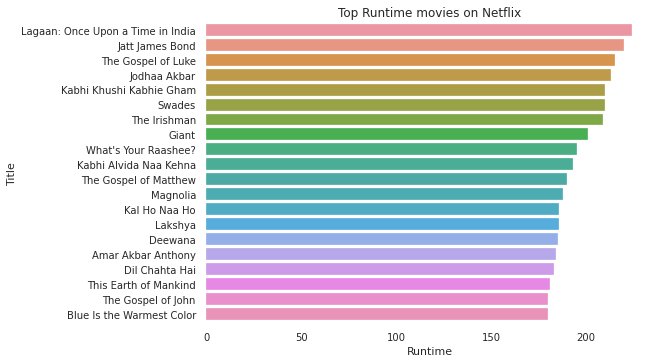

In [359]:
# Runtime
runtime_net = netflix_movies.sort_values(by='Runtime',ascending=False).head(20)
runtime_net

sns.barplot(data=runtime_net, y='Title',x='Runtime')
plt.title('Top Runtime movies on Netflix')

In [360]:
net_movies = netflix_movies[netflix_movies['IMDb'] > 8]
net_movies_count = net_movies.shape[0]
print("Movies with IMDB 8+ Rating in netflix: {}".format(net_movies_count))

Movies with IMDB 8+ Rating in netflix: 129


Text(0.5, 1.0, 'Top IMDB movies on Netflix')

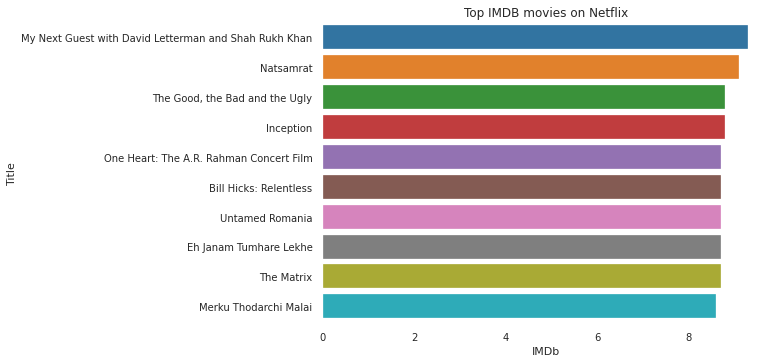

In [361]:
net_movies = net_movies.sort_values(by='IMDb', ascending=False).head(10)
sns.barplot(data=net_movies, y='Title',x='IMDb')
plt.title('Top IMDB movies on Netflix')

In [362]:
movie_type = netflix_movies['mov_type'].value_counts().index.tolist()
print(movie_type[:9])

['comedy', 'drama', 'documentary', 'thriller', 'horror', 'action', 'animation', 'sci-fi', 'romance']


In [363]:
# thriller movies

def movie_plot(movie) : 
    print(movie)
    thriller_net = netflix_movies[netflix_movies['mov_type'] == movie]
    net_movies = thriller_net.sort_values(by='IMDb', ascending=False).head(10)
    sns.barplot(data=net_movies, y='Title',x='IMDb')
    plt.title('Top 10 {} movies on Netflix'.format(movie))


thriller


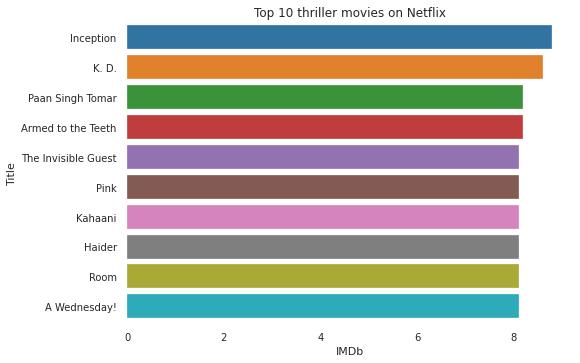

In [364]:
movie_plot('thriller')

sci-fi


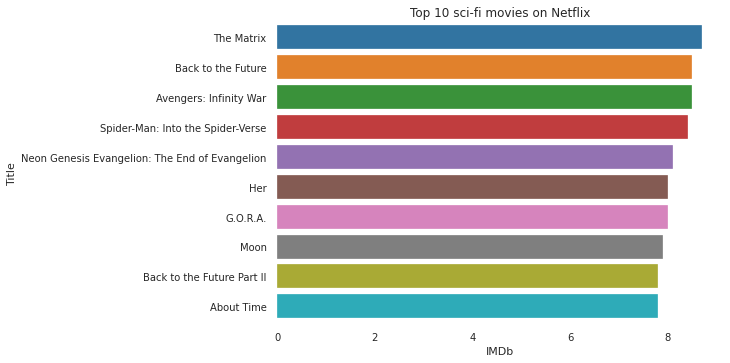

In [365]:
movie_plot('sci-fi')

action


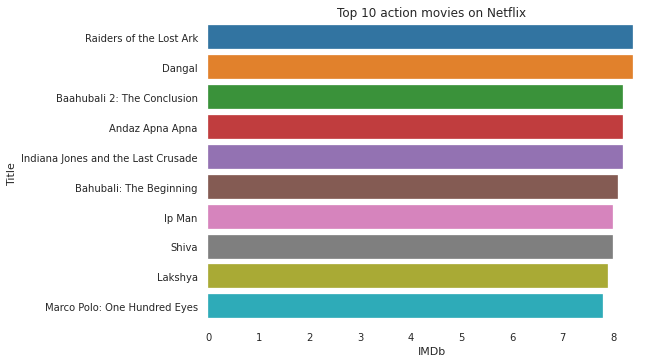

In [366]:
movie_plot('action')

horror


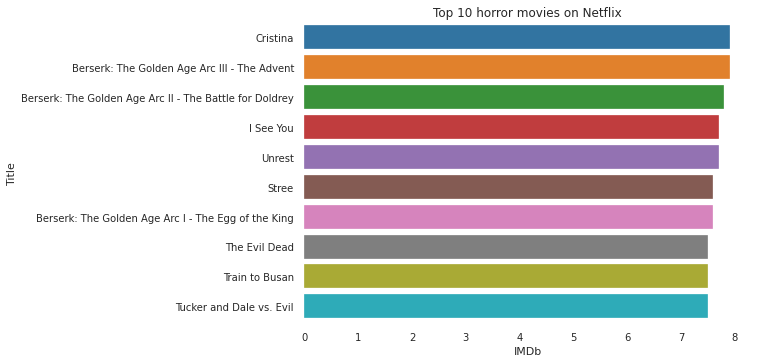

In [367]:
movie_plot('horror')

animation


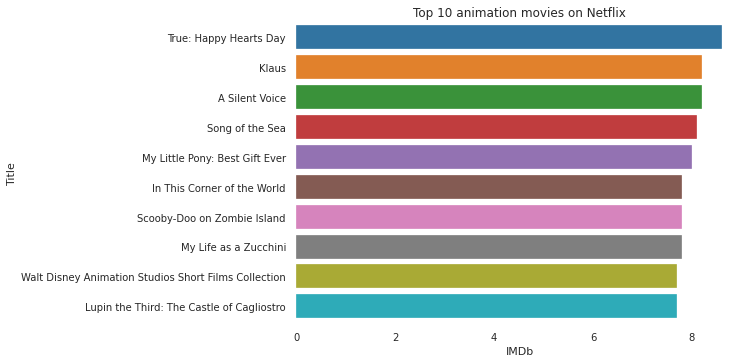

In [368]:
movie_plot('animation')

In [369]:
hulu_movies.head(4)

ID                 Title  Year  Age  IMDb Rotten Tomatoes  Hulu  Type  \
67    68             Blackfish  2013  13+   8.1             98%  hulu     0   
97    98  Jiro Dreams of Sushi  2011   7+   7.9             99%  hulu     0   
146  147           The Patriot  2000  18+   7.2             61%  hulu     0   
148  149            The Square  2013  NaN   8.1            100%  hulu     0   

                  Directors                    Genres  \
67   Gabriela Cowperthwaite          Documentary,News   
97               David Gelb               Documentary   
146         Roland Emmerich  Action,Drama,History,War   
148           Ruben Östlund              Comedy,Drama   

                                         Country                Language  \
67                                 United States         English,Spanish   
97                                 United States                Japanese   
146                        United States,Germany          English,French   
148  Sweden,Germany,France,Denmark,United States  Swedish,English,Danish   

     Runtime Rotten_Tomatoes_overview  IMDB_group     mov_type  
67      83.0                      100         8.0  documentary  
97      81.0                      100         8.0  documentary  
146    165.0                       70         7.0       action  
148    151.0                      100         8.0       comedy

In [370]:
def run_time(dataframe,ott):
    runtime_data = dataframe.sort_values(by='Runtime',ascending=False).head(10)
    sns.barplot(data=runtime_data,y='Title',x='Runtime')
    plt.title("Top Runtime movies on {}".format(ott))

In [371]:
def top_imdb(dataframe,ott):
    movies = dataframe[dataframe['IMDb'] > 8]
    movies = movies.sort_values(by='IMDb',ascending=False).head(10)
    sns.barplot(data=movies,y='Title',x='IMDb')
    plt.title("Top IMDB movies on {}".format(ott))

In [372]:
def movie_plot_plat(movie, dataframe, ott) : 
    print(movie)
    thriller_net = dataframe[dataframe['mov_type'] == movie]
    net_movies = thriller_net.sort_values(by='IMDb', ascending=False).head(10)
    sns.barplot(data=net_movies, y='Title',x='IMDb')
    plt.title('Top 10 {} movies on {}'.format(movie, ott))

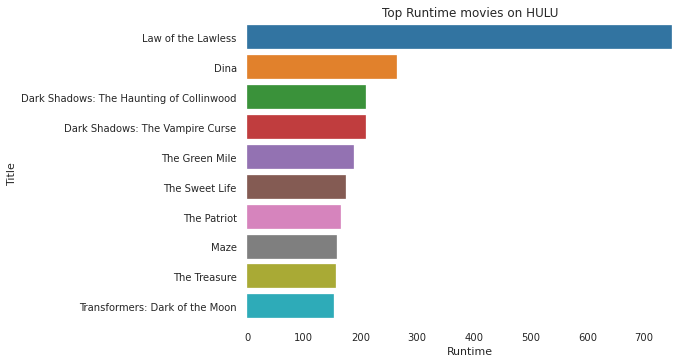

In [373]:
# HULU

run_time(hulu_movies,'HULU')

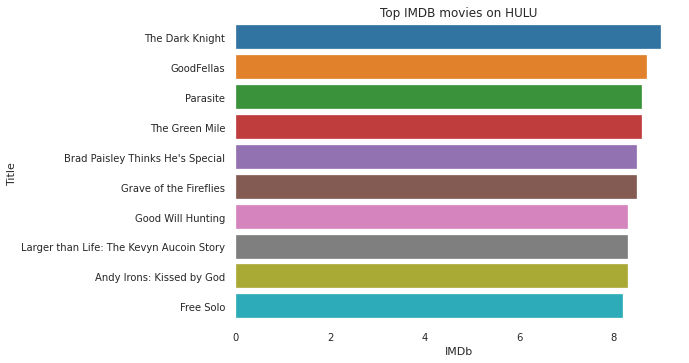

In [374]:
top_imdb(hulu_movies, 'HULU')

thriller


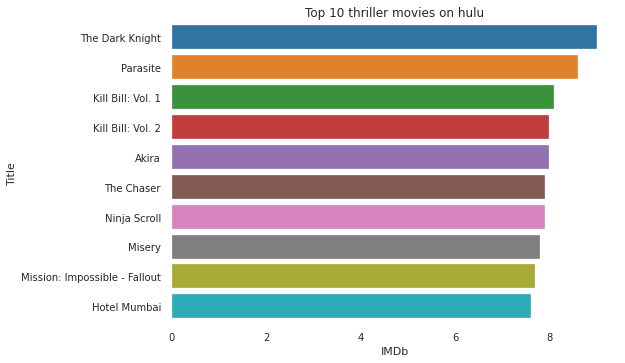

In [375]:
movie_plot_plat('thriller',hulu_movies,'hulu')

action


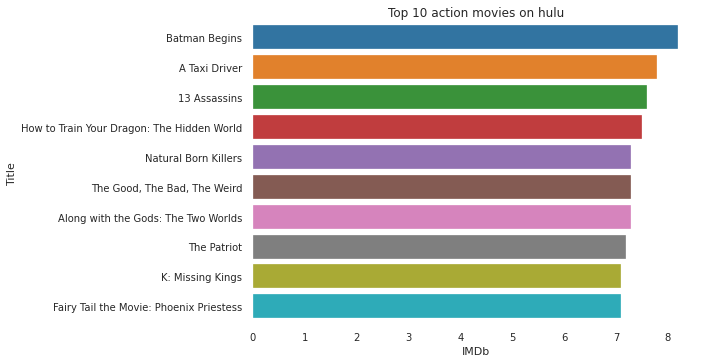

In [376]:
movie_plot_plat('action',hulu_movies,'hulu')

horror


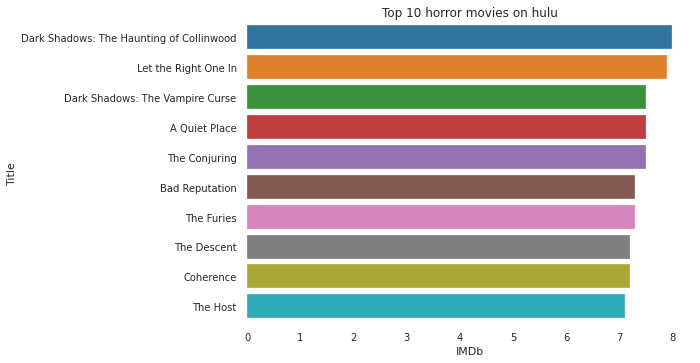

In [377]:
movie_plot_plat('horror',hulu_movies,'hulu')

animation


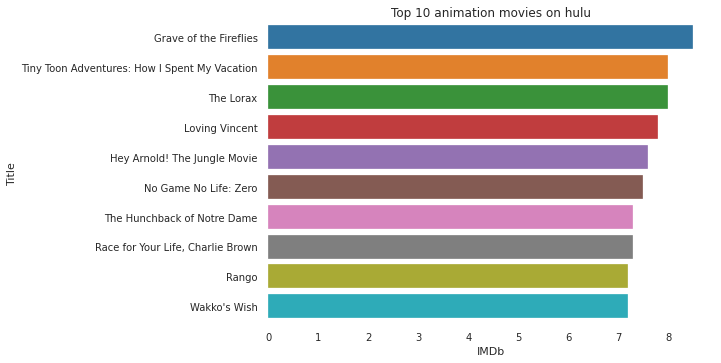

In [378]:
movie_plot_plat('animation',hulu_movies,'hulu')

sci-fi


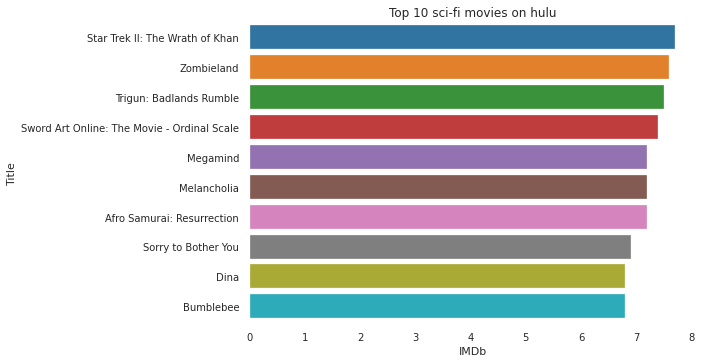

In [379]:
movie_plot_plat('sci-fi',hulu_movies,'hulu')

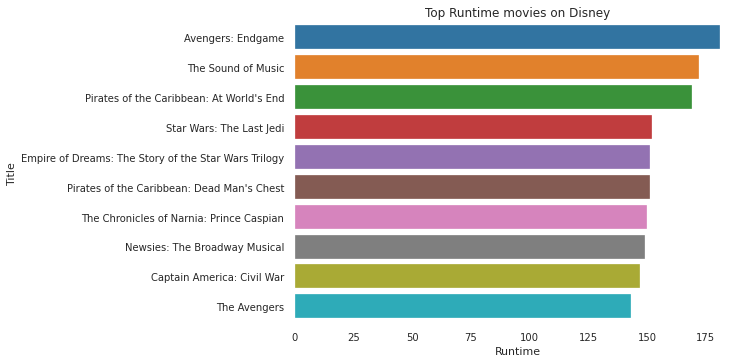

In [380]:
# diSNEY+

run_time(disney_movies,'Disney')



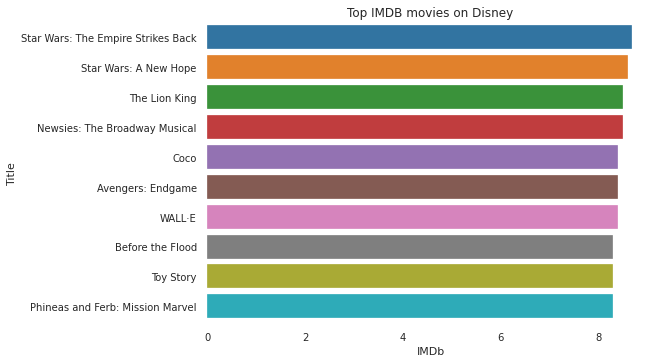

In [381]:
top_imdb(disney_movies, 'Disney')


thriller


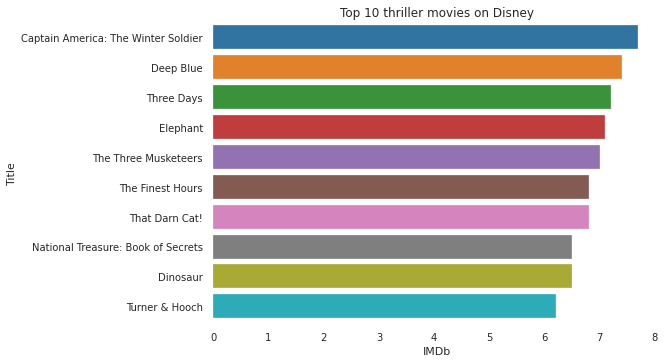

In [382]:
movie_plot_plat('thriller',disney_movies,'Disney')


action


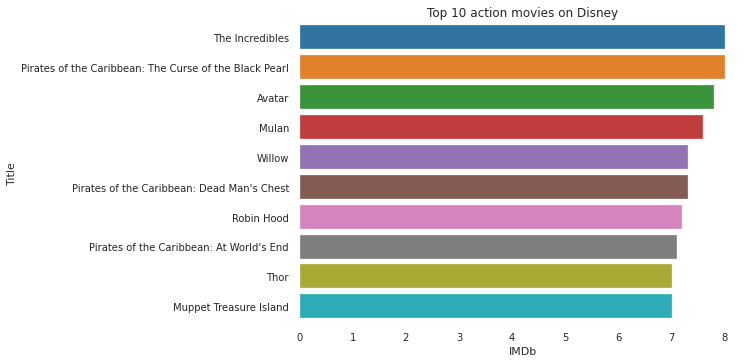

In [383]:
movie_plot_plat('action',disney_movies,'Disney')


horror


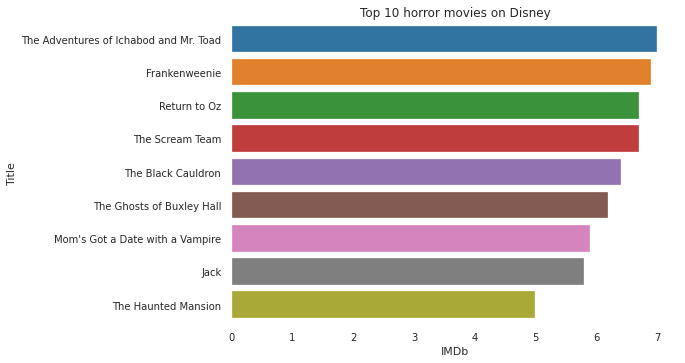

In [384]:
movie_plot_plat('horror',disney_movies,'Disney')


animation


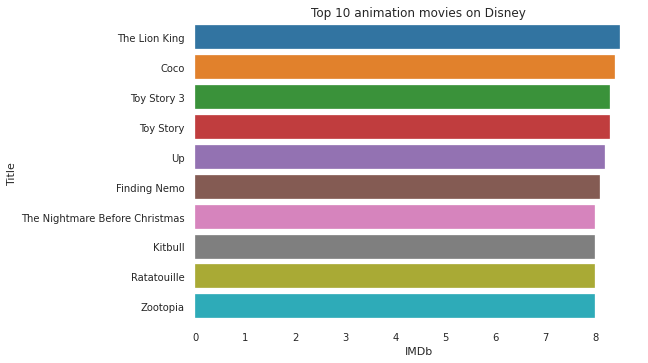

In [385]:
movie_plot_plat('animation',disney_movies,'Disney')


sci-fi


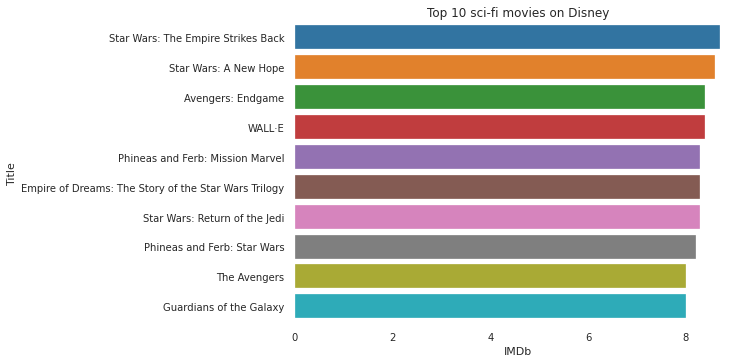

In [386]:
movie_plot_plat('sci-fi',disney_movies,'Disney')

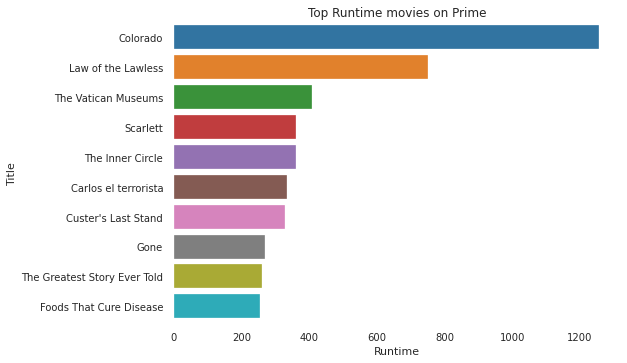

In [387]:
# Prime

run_time(prime_movies,'Prime')

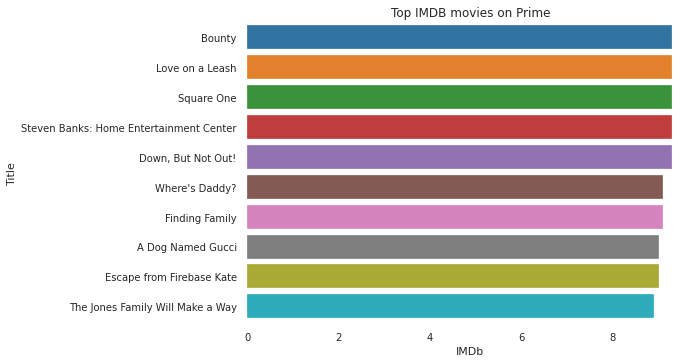

In [388]:
top_imdb(prime_movies, 'Prime')


thriller


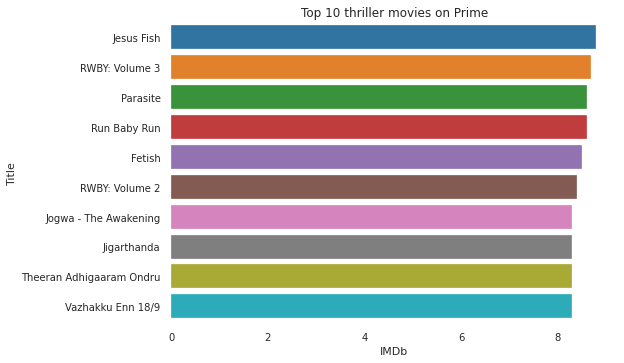

In [389]:
movie_plot_plat('thriller',prime_movies,'Prime')

action


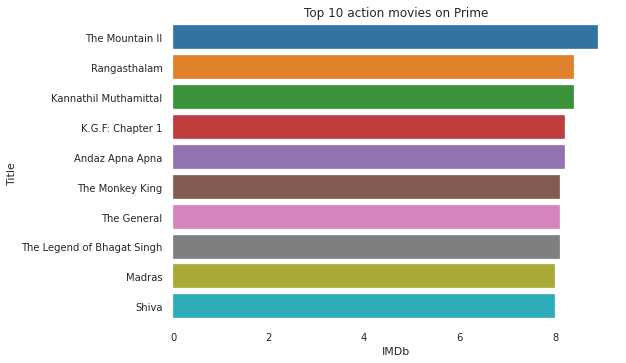

In [390]:
movie_plot_plat('action',prime_movies,'Prime')

horror


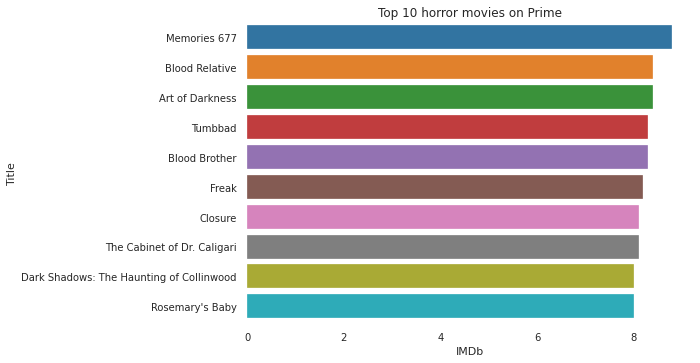

In [391]:
movie_plot_plat('horror',prime_movies,'Prime')

animation


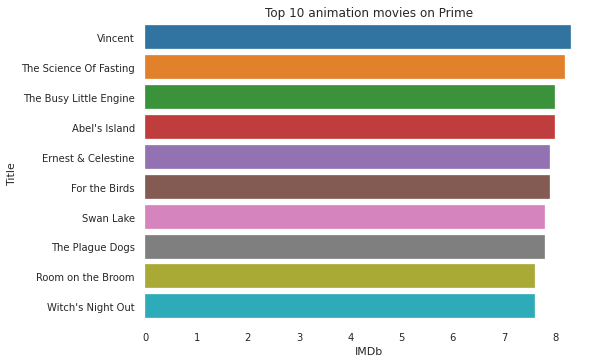

In [392]:
movie_plot_plat('animation',prime_movies,'Prime')

sci-fi


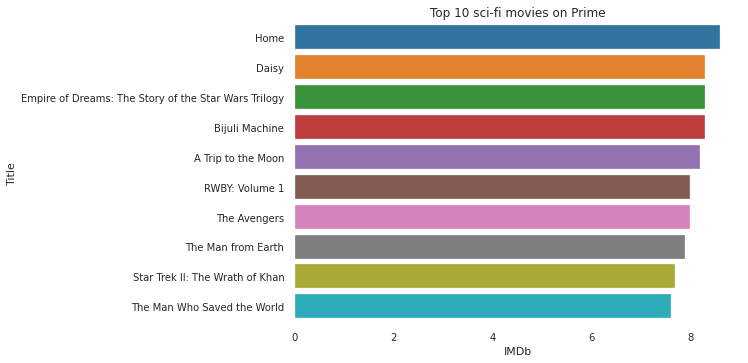

In [393]:
movie_plot_plat('sci-fi',prime_movies,'Prime')

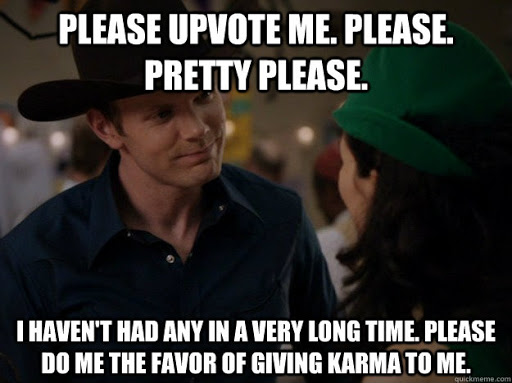